# 1. Computer Language

**Learning goals**
- Understand what "computer language" means (machine ↔ assembly ↔ high-level).
- See how *interpreted* vs *compiled* languages differ.
- Know where Python fits and why it's popular for data + science.

---
## Concepts
- **Machine code:** 0/1 instructions executed by CPU.
- **Assembly:** Low-level mnemonics (MOV, ADD). Architecture‑specific.
- **High‑level:** Python, JavaScript, C#, etc. Easier to read/write.
- **Compilation vs Interpretation:**
  - *Compiled* (e.g., C/C++): source → binary before running.
  - *Interpreted* (e.g., Python): run line-by-line (actually CPython compiles to bytecode `.pyc` then interprets).
- **Why Python?**
  - Clean syntax, huge ecosystem (NumPy, pandas, scikit‑learn), active community, great for teaching.

## Python execution model (CPython)
- Source `.py` → **bytecode** (`.pyc`) → **Python Virtual Machine**
- Optional: JITs like PyPy, or use C-extensions for speed (NumPy).


## Language Levels Expanded

- **Machine Language (Binary):**
  - Direct 0/1 instructions (e.g., `10110000 01100001`).
  - Hardware-specific, not human-friendly.

- **Assembly Language:**
  - Mnemonics like `MOV A, 61h`.
  - Still tied to specific CPU architectures.

- **Low-level Languages (C, C++):**
  - Closer to hardware, manual memory management, very efficient.
  - Need compilation.

- **Mid-level Languages (Java, C#):**
  - Run on virtual machines (JVM, .NET CLR).
  - Balance between performance and abstraction.

- **High-level Languages (Python, Ruby, JavaScript):**
  - Easy to learn/read, automatic memory management, huge ecosystems.

---
### Diagram: Levels of Programming Languages


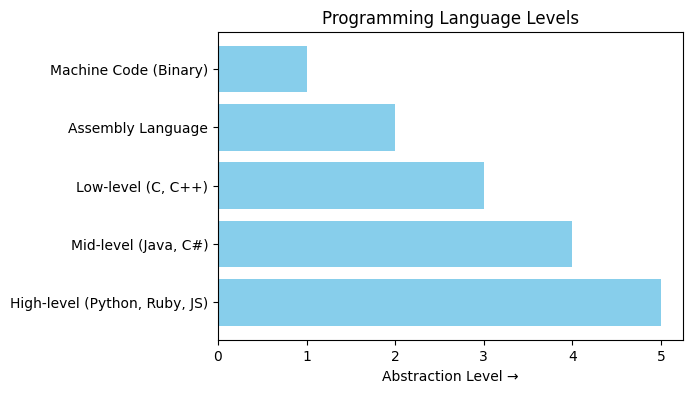

In [10]:

import matplotlib.pyplot as plt

levels = [
    "Machine Code (Binary)",
    "Assembly Language",
    "Low-level (C, C++)",
    "Mid-level (Java, C#)",
    "High-level (Python, Ruby, JS)"
]

fig, ax = plt.subplots(figsize=(6,4))
ax.barh(range(len(levels)), range(1, len(levels)+1), color="skyblue")
ax.set_yticks(range(len(levels)))
ax.set_yticklabels(levels)
ax.invert_yaxis()
ax.set_xlabel("Abstraction Level →")
ax.set_title("Programming Language Levels")
plt.show()


# 🔭 Language Landscape: From Machine Code to High‑Level

**Goal:** See where different languages sit on the abstraction spectrum and how they execute.

## Spectrum (low → high)
- **Machine code (binary):** Exact CPU instructions (e.g., `0xB8 0x01 0x00 ...`). Not human friendly.
- **Assembly:** One‑to‑one mnemonics for machine ops (e.g., `MOV EAX, 1`). CPU/OS specific.
- **Low‑level systems languages:** Close to hardware, manual memory & pointers.
  - Examples: **C**, **C++**
- **Modern systems languages:** Low‑level control with safer memory models.
  - Examples: **Rust** (ownership/borrow), **Go** (simplicity, GC)
- **Managed/AOT/JIT compiled languages:** Typically compile to bytecode or native with runtime/VM.
  - Examples: **Java** (JVM), **C#** (.NET), **Kotlin**, **Swift**
- **High‑level scripting/interpreted languages:** Fast to write, vast ecosystems.
  - Examples: **Python**, **Ruby**, **JavaScript**
- **Domain‑specific languages (DSLs):** Designed for a specific task/domain.
  - Examples: **SQL** (databases), **Regex** (pattern language), **MATLAB/R** (scientific), **Bash** (shell)
- **Very‑high‑level frameworks & tools:** Libraries/frameworks that abstract algorithms/systems.
  - Examples: **scikit‑learn**, **TensorFlow**, **Django/Flask**, **pandas**

## Execution models (how code runs)
- **AOT (Ahead‑of‑Time) compiled → native**: C/C++, Rust, Swift (typically)  
- **Bytecode + VM/JIT**: Java (JVM), C# (.NET), Python (CPython bytecode + interpreter; PyPy JIT)  
- **Interpreted**: Bash, many JS environments historically (modern JS often JIT in V8)  
- **Hybrid**: Many languages use multiple strategies depending on implementation.

**Memory management**
- Manual: C, C++
- Ownership/borrowing: Rust
- Garbage collection (GC): Java, Go, C#, JavaScript
- Reference counting/GC hybrids: Python (refcount + cycle GC)

## Tiny “Hello, World!” tour (read‑only snippets)

```assembly
; x86-64 Linux (NASM) — *illustrative*
global _start
section .text
_start:
    mov rax, 1          ; write
    mov rdi, 1          ; fd=stdout
    mov rsi, msg
    mov rdx, msglen
    syscall
    mov rax, 60         ; exit
    xor rdi, rdi
    syscall
section .data
msg: db "Hello, world!", 10
msglen: equ $-msg
```

```c
// C
#include <stdio.h>
int main() {
  printf("Hello, world!\n");
  return 0;
}
```

```rust
// Rust
fn main() {
    println!("Hello, world!");
}
```

```go
// Go
package main
import "fmt"
func main(){ fmt.Println("Hello, world!") }
```

```java
// Java
class Main {
  public static void main(String[] args){ System.out.println("Hello, world!"); }
}
```

```python
# Python
print("Hello, world!")
```

```sql
-- SQL
SELECT 'Hello, world!' AS greeting;
```

```bash
# Bash
echo "Hello, world!"
```

## Quick comparison (informal)

| Tier | Examples | Typical compile/run | Memory mgmt | Portability |
|---|---|---|---|---|
| Machine/Assembly | Binary, ASM | Native | N/A | CPU-specific |
| Low-level systems | C/C++ | AOT native | Manual | High (recompile) |
| Modern systems | Rust/Go | AOT native | Ownership / GC | High |
| Managed VM | Java/C# | Bytecode + JIT | GC | Very high |
| Scripting | Python/JS/Ruby | Bytecode + interpreter/JIT | Refcount/GC | Very high |
| DSL | SQL/Regex/MATLAB/R | Engine-specific | Engine | Engine-specific |

> Python sits high on abstraction, with huge libraries (science/data/web), which is perfect for learning and research.

# ⚙️ Program Flow: From Source Code to Processor

Understanding how code turns into actions on a computer helps you see *why different languages behave differently*.

## General flow

`Source Code → Compilation/Interpretation → Machine Instructions → CPU executes`

- **Compiled languages (C, C++):**
  - Source code is **compiled** into machine code (binary).
  - Binary runs directly on CPU.
- **Interpreted languages (Python):**
  - Source code is **parsed** and converted to **bytecode**.
  - A **virtual machine/interpreter** runs the bytecode, issuing instructions to CPU.
- **Hybrid (Java, C#):**
  - Compiled into **bytecode** (JVM or CLR).
  - Then **JIT (Just-in-Time)** compiles to machine code at runtime.

This distinction explains why compiled programs often run faster, while interpreted ones are more flexible and portable.

## Diagram: Program Flow (Python vs C)

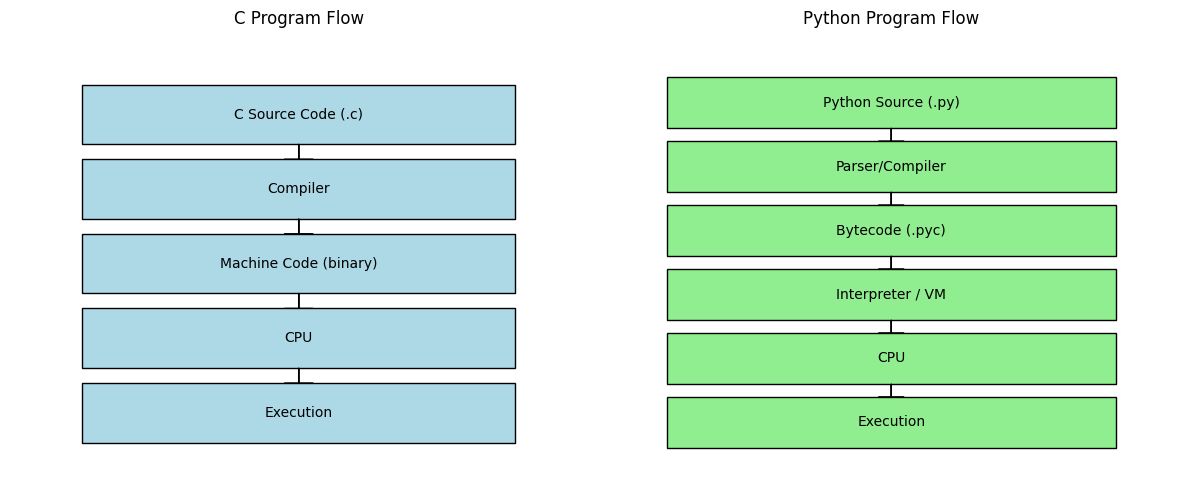

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Flow for C (compiled)
c_steps = ["C Source Code (.c)", "Compiler", "Machine Code (binary)", "CPU", "Execution"]
y = list(range(len(c_steps)))[::-1]
for i, step in enumerate(c_steps):
    axes[0].add_patch(mpatches.Rectangle((0, y[i]), 3, 0.8, edgecolor="black", facecolor="lightblue"))
    axes[0].text(1.5, y[i]+0.4, step, ha="center", va="center")
    if i < len(c_steps)-1:
        axes[0].arrow(1.5, y[i], 0, -0.2, head_width=0.2, head_length=0.2, fc="black", ec="black")
axes[0].set_xlim(-0.5,3.5); axes[0].set_ylim(-0.5,len(c_steps)+0.5)
axes[0].axis("off"); axes[0].set_title("C Program Flow")

# Flow for Python (interpreted)
py_steps = ["Python Source (.py)", "Parser/Compiler", "Bytecode (.pyc)", "Interpreter / VM", "CPU", "Execution"]
y = list(range(len(py_steps)))[::-1]
for i, step in enumerate(py_steps):
    axes[1].add_patch(mpatches.Rectangle((0, y[i]), 3.5, 0.8, edgecolor="black", facecolor="lightgreen"))
    axes[1].text(1.75, y[i]+0.4, step, ha="center", va="center")
    if i < len(py_steps)-1:
        axes[1].arrow(1.75, y[i], 0, -0.2, head_width=0.2, head_length=0.2, fc="black", ec="black")
axes[1].set_xlim(-0.5,4); axes[1].set_ylim(-0.5,len(py_steps)+0.5)
axes[1].axis("off"); axes[1].set_title("Python Program Flow")

plt.tight_layout()
plt.show()

## Extended Diagram: Adding Java (Bytecode + JVM)

Now we add Java to the flow comparison.  
Java source code is compiled to **bytecode (.class)**, then executed on the **JVM (Java Virtual Machine)**.  
The JVM can interpret the bytecode or use **JIT (Just-in-Time) compilation** to translate it into machine code at runtime.

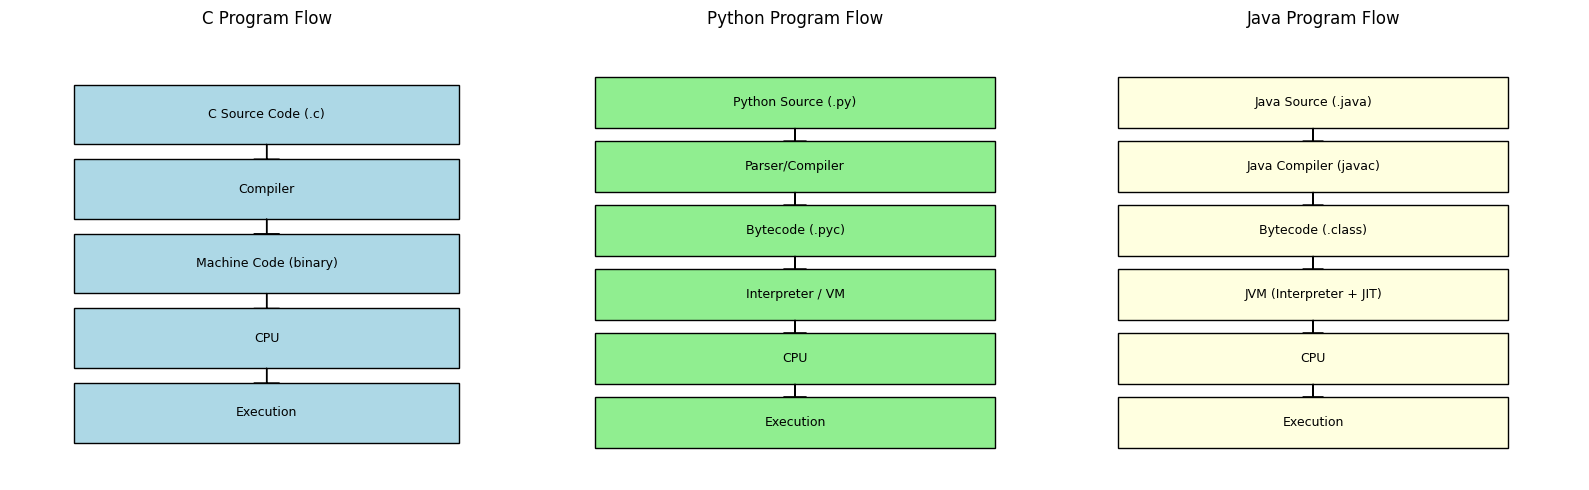

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 3, figsize=(16,5))

# Flow for C (compiled)
c_steps = ["C Source Code (.c)", "Compiler", "Machine Code (binary)", "CPU", "Execution"]
y = list(range(len(c_steps)))[::-1]
for i, step in enumerate(c_steps):
    axes[0].add_patch(mpatches.Rectangle((0, y[i]), 3, 0.8, edgecolor="black", facecolor="lightblue"))
    axes[0].text(1.5, y[i]+0.4, step, ha="center", va="center", fontsize=9)
    if i < len(c_steps)-1:
        axes[0].arrow(1.5, y[i], 0, -0.2, head_width=0.2, head_length=0.2, fc="black", ec="black")
axes[0].set_xlim(-0.5,3.5); axes[0].set_ylim(-0.5,len(c_steps)+0.5)
axes[0].axis("off"); axes[0].set_title("C Program Flow")

# Flow for Python (interpreted)
py_steps = ["Python Source (.py)", "Parser/Compiler", "Bytecode (.pyc)", "Interpreter / VM", "CPU", "Execution"]
y = list(range(len(py_steps)))[::-1]
for i, step in enumerate(py_steps):
    axes[1].add_patch(mpatches.Rectangle((0, y[i]), 3.5, 0.8, edgecolor="black", facecolor="lightgreen"))
    axes[1].text(1.75, y[i]+0.4, step, ha="center", va="center", fontsize=9)
    if i < len(py_steps)-1:
        axes[1].arrow(1.75, y[i], 0, -0.2, head_width=0.2, head_length=0.2, fc="black", ec="black")
axes[1].set_xlim(-0.5,4); axes[1].set_ylim(-0.5,len(py_steps)+0.5)
axes[1].axis("off"); axes[1].set_title("Python Program Flow")

# Flow for Java (compiled to bytecode)
java_steps = ["Java Source (.java)", "Java Compiler (javac)", "Bytecode (.class)", "JVM (Interpreter + JIT)", "CPU", "Execution"]
y = list(range(len(java_steps)))[::-1]
for i, step in enumerate(java_steps):
    axes[2].add_patch(mpatches.Rectangle((0, y[i]), 3.8, 0.8, edgecolor="black", facecolor="lightyellow"))
    axes[2].text(1.9, y[i]+0.4, step, ha="center", va="center", fontsize=9)
    if i < len(java_steps)-1:
        axes[2].arrow(1.9, y[i], 0, -0.2, head_width=0.2, head_length=0.2, fc="black", ec="black")
axes[2].set_xlim(-0.5,4.5); axes[2].set_ylim(-0.5,len(java_steps)+0.5)
axes[2].axis("off"); axes[2].set_title("Java Program Flow")

plt.tight_layout()
plt.show()

## Java Program Flow (Bytecode + JVM + JIT)

**Java (and many JVM languages like Kotlin/Scala)** use a two‑stage approach:

1) **Compile** source (`.java`) → **JVM bytecode** (`.class` / `.jar`).  
2) **Run on the JVM** (Java Virtual Machine):
   - Bytecode is **verified** and **interpreted** initially.
   - **JIT (Just‑in‑Time) compiler** profiles hot code paths and compiles them to native machine code at runtime.
   - The CPU executes the JIT‑compiled machine code for performance.

This gives Java strong **portability** (same bytecode across OS/CPU with a compatible JVM) and good **runtime performance** via JIT.

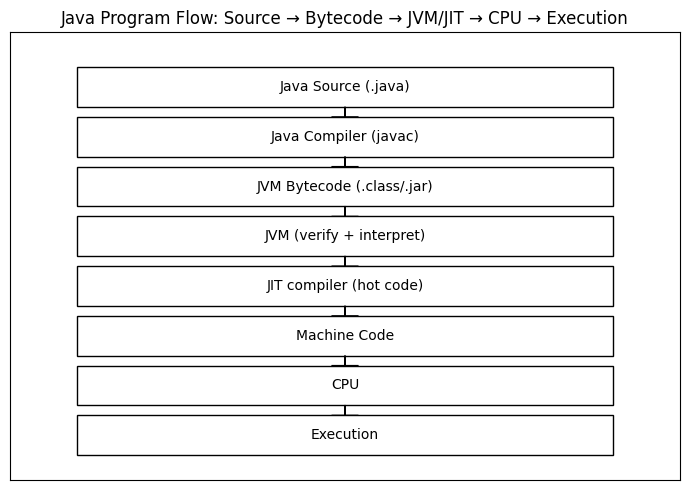

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(7,5))

steps = [
    "Java Source (.java)",
    "Java Compiler (javac)",
    "JVM Bytecode (.class/.jar)",
    "JVM (verify + interpret)",
    "JIT compiler (hot code)",
    "Machine Code",
    "CPU",
    "Execution"
]

y = list(range(len(steps)))[::-1]

for i, step in enumerate(steps):
    rect = mpatches.Rectangle((0, y[i]), 4, 0.8, edgecolor="black", facecolor="white")
    plt.gca().add_patch(rect)
    plt.text(2, y[i]+0.4, step, ha="center", va="center")
    if i < len(steps)-1:
        plt.arrow(2, y[i], 0, -0.2, head_width=0.2, head_length=0.2)

plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, len(steps)+0.5)
plt.xticks([]); plt.yticks([])
plt.title("Java Program Flow: Source → Bytecode → JVM/JIT → CPU → Execution")
plt.tight_layout()
plt.show()

## 🔍 Comparison: C vs Java vs Python

| Feature | **C** | **Java** | **Python** |
|---------|-------|----------|------------|
| **Execution model** | Ahead‑of‑time compiled → machine code | Compiled → bytecode → JVM + JIT → machine code | Source → bytecode → interpreter (VM) |
| **Performance** | Very high (close to hardware) | High (JIT optimizations) | Moderate (interpreter overhead) |
| **Portability** | Requires recompilation per platform | Very high (JVM everywhere) | Very high (Python VM everywhere) |
| **Memory management** | Manual (malloc/free) | Garbage collected (JVM GC) | Reference counting + GC |
| **Use cases** | Systems programming, OS, embedded | Enterprise apps, Android, cross‑platform servers | Data science, scripting, rapid prototyping |

## ⚡ Demo: JIT Compilation in Python with Numba

While CPython normally interprets bytecode, we can use libraries like **Numba** to add JIT compilation (similar to Java’s JVM JIT).

Below, we compare a pure Python loop vs a JIT‑compiled version.

In [14]:
# If needed, install numba first:
# !pip install numba

import time
import numpy as np

def py_sum(x):
    total = 0.0
    for v in x:
        total += v
    return total

# JIT version
try:
    from numba import njit
    jit_sum = njit(py_sum)
except ImportError:
    print("Numba not installed, skipping JIT demo.")
    jit_sum = py_sum

# Test arrays
arr = np.random.rand(10_000_00)

# Pure Python
t0 = time.time(); res1 = py_sum(arr); t1 = time.time()
print("Python sum:", res1, "time:", round(t1-t0,4),"s")

# JIT (first call includes compile time)
t0 = time.time(); res2 = jit_sum(arr); t1 = time.time()
print("JIT sum first run:", res2, "time:", round(t1-t0,4),"s")

# JIT (second call is optimized machine code)
t0 = time.time(); res3 = jit_sum(arr); t1 = time.time()
print("JIT sum second run:", res3, "time:", round(t1-t0,4),"s")

Python sum: 499570.9483610418 time: 0.1691 s
JIT sum first run: 499570.9483610418 time: 0.5173 s
JIT sum second run: 499570.9483610418 time: 0.001 s


## ⚖️ Performance vs Portability: C vs Java vs Python

| Language | Execution model | Typical runtime performance | Startup/latency | Memory management | Portability | Ecosystem & notes | Good fit for |
|---|---|---|---|---|---|---|---|
| **C/C++** | AOT native binary | ★★★★★ (fastest, near-metal) | ★★★★☆ (fast start) | Manual (pointers) | Recompile per target | Systems, HPC, embedded; rich but lower-level | OS kernels, drivers, high‑perf libs |
| **Java** | Bytecode on JVM + **JIT** | ★★★★☆ (fast after warm‑up) | ★★☆☆☆ (JVM warm‑up) | GC | Very high (JVM everywhere) | Strong enterprise tooling; excellent profiling | Cross‑platform servers, Android (Kotlin) |
| **Python** | Bytecode + interpreter (CPython) | ★★☆☆☆ (pure Python); **★★★★☆** with C libs (NumPy) / JIT | ★★★★☆ (fast start) | Refcount + GC | Very high | Huge scientific stack (NumPy, pandas, scikit‑learn); rapid dev | Data science, scripting, education, research |

**Rules of thumb**
- If you need **absolute speed** and fine control → C/C++ (or Rust).
- If you need **portability + long‑running services** → Java/Kotlin on JVM.
- If you need **productivity + rich data/ML ecosystem** → Python (and offload hot spots to C/NumPy/Numba/Cython).

## ⚡ Optional JIT demo in Python (Numba)

Below we compare a **pure Python** function vs an identical function compiled with **Numba JIT** (if available).  
If Numba is not installed, the cell will run only the pure‑Python version.

> Tip: On many data‑science stacks, heavy numeric work is vectorized in **NumPy** (already C‑optimized). JIT helps most when you have tight Python loops you can't easily vectorize.

In [4]:
import math, time
N = 2_000_000  # adjust if your machine is slow

def sum_squares_py(n:int)->int:
    s = 0
    for i in range(n):
        s += i*i
    return s

# Time pure Python
t0 = time.perf_counter()
res_py = sum_squares_py(N)
t1 = time.perf_counter()

print(f"Pure Python: result={res_py} time={t1-t0:.6f}s (N={N})")

# Try Numba if available
try:
    from numba import njit
    sum_squares_jit = njit(sum_squares_py)

    # First call includes compile time
    t2 = time.perf_counter()
    res_jit_1 = sum_squares_jit(N)
    t3 = time.perf_counter()

    # Second call = hot path (already compiled)
    t4 = time.perf_counter()
    res_jit_2 = sum_squares_jit(N)
    t5 = time.perf_counter()

    assert res_py == res_jit_1 == res_jit_2
    print(f"Numba JIT (compile+run): time={t3-t2:.6f}s")
    print(f"Numba JIT (hot run):     time={t5-t4:.6f}s")
except Exception as e:
    print("Numba not available or failed to compile:", e)
    print("Tip: `pip install numba` to try the JIT demo.")

Pure Python: result=2666664666667000000 time=0.252794s (N=2000000)
Numba JIT (compile+run): time=0.056990s
Numba JIT (hot run):     time=0.000013s
